In [1]:
import itertools

from scipy.special import erfinv
import numpy as np

import matplotlib.pyplot as plt

In [2]:
true = 5

In [3]:
sizes = [100, 1_000, 10_000]
repeats = [10, 100, 1000]

product = list(itertools.product(sizes, repeats))

In [4]:
def quantile_function(q, mu, sigma):
    return sigma * np.sqrt(2) * erfinv(2 * q - 1) + mu 

In [5]:
from collections import defaultdict

results = defaultdict(list)

for size, repeat in product:
    for _ in range(repeat):
        quantiles = np.random.uniform(size=size)
        distribution = quantile_function(quantiles, mu=true, sigma=1)
        results[(size, repeat)].append(np.mean(distribution)) # from formula

In [6]:
def plot_stats(thetas, size, repeat):
    plt.figure(figsize=(5, 5))
    plt.hist(thetas, bins=30, alpha=0.6, label=f'{size=} {repeat=}')
    plt.title('Theta* distribution')
    plt.legend()
    plt.show()

In [7]:
def print_stats(thetas, thetas_true):
    print(f'var={np.var(thetas)} mean={np.mean(thetas)} mse={np.mean((thetas - thetas_true) ** 2)}')

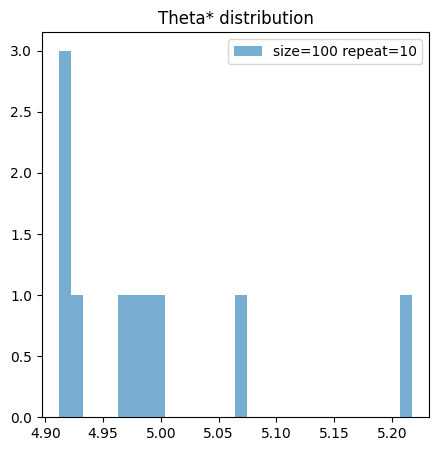

var=0.00802202491924866 mean=4.988699671274409 mse=0.00814972234855507


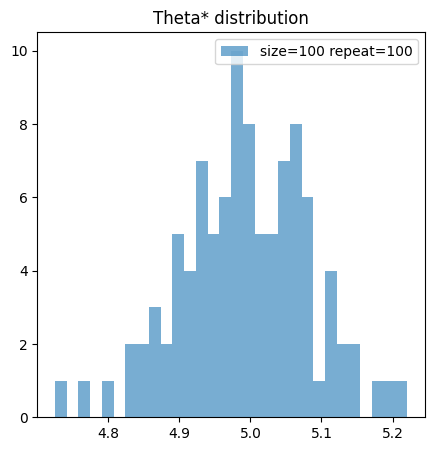

var=0.0083120500452085 mean=4.992319175248455 mse=0.008371045114072441


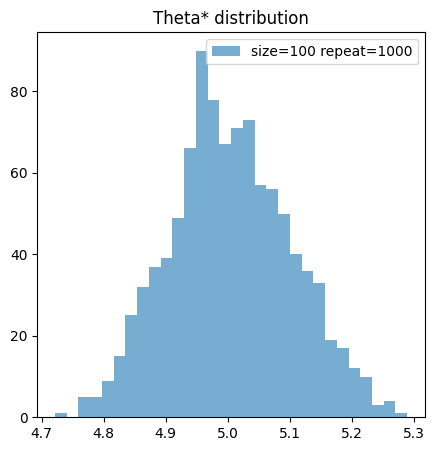

var=0.00950842537907112 mean=5.00458828115944 mse=0.009529477703069191


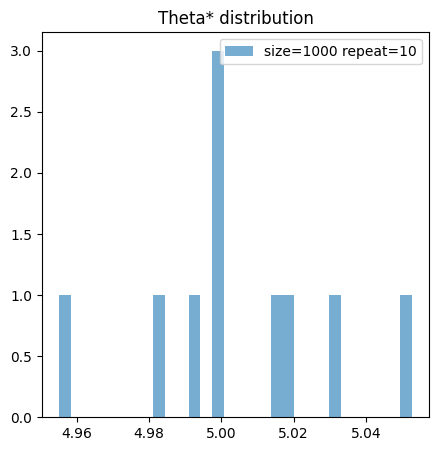

var=0.0006338263097723559 mean=5.004145765676316 mse=0.0006510136828152763


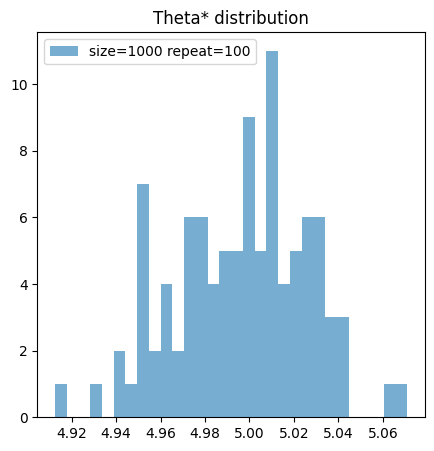

var=0.000886234307789836 mean=4.996479747011701 mse=0.0008986264888914667


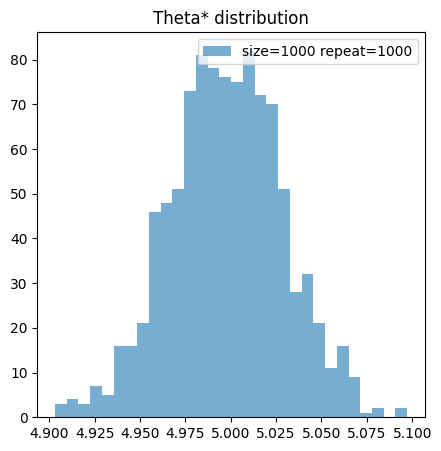

var=0.0009596946711426567 mean=4.997710834323004 mse=0.0009649349506393927


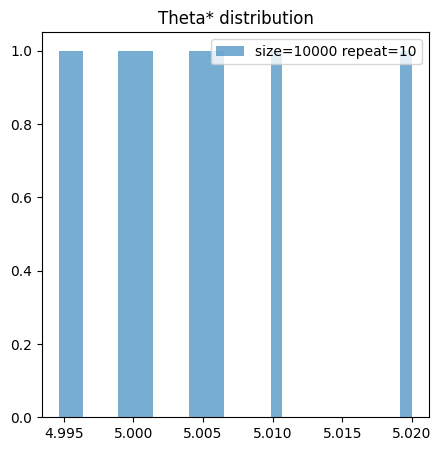

var=5.092398503448904e-05 mean=5.0035426533672105 mse=6.347437791470318e-05


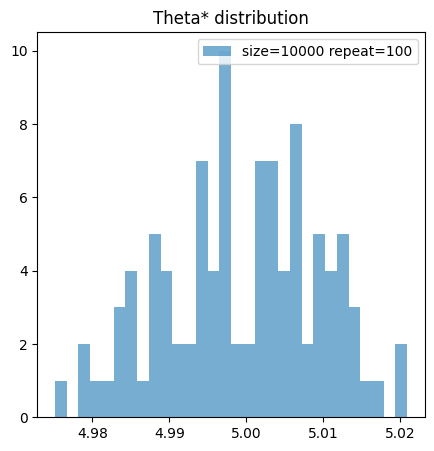

var=0.00010202655472372452 mean=4.999392319943078 mse=0.00010239582977530525


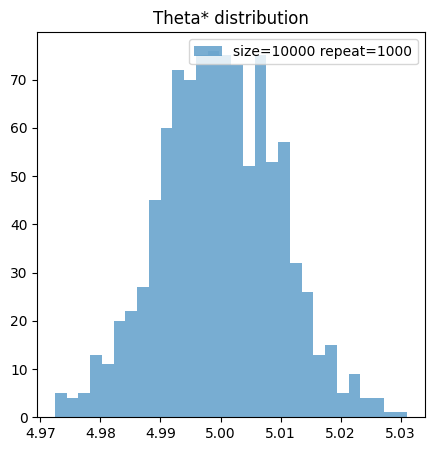

var=9.71660972851152e-05 mean=4.999863825819304 mse=9.71846406926034e-05


In [8]:
for size, repeat in product:
    thetas = results[(size, repeat)]
    thetas_true = np.array([true for _ in range(len(thetas))])
    
    diff = np.abs(thetas - thetas_true)
    variance = np.var(thetas)
    mse = np.mean((thetas - thetas_true) ** 2)
    
    plot_stats(thetas, size, repeat)
    print_stats(thetas, thetas_true)

In [9]:
results

defaultdict(list,
            {(100, 10): [4.972094554631728,
              4.912142170999816,
              5.070168815130982,
              4.9251505275102385,
              5.217063740529673,
              4.913415619326183,
              4.915761015116988,
              4.9745154082144785,
              4.98976713643505,
              4.996917724848955],
             (100, 100): [4.724879625595024,
              4.909671583193716,
              4.92804657965666,
              5.064097897317068,
              5.041251396970598,
              4.936564454092478,
              5.022866699833041,
              5.039051916208951,
              5.062490712524392,
              4.9378020771651325,
              4.831166079088252,
              4.911115620541104,
              5.203034171436096,
              4.90566440975304,
              4.972334873804056,
              4.877006408857076,
              4.851150883089892,
              4.904603832117582,
              5.000021301545604,
 

[Свойства оценок](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0)